# Penentuan Tujuan (Problem Definition)
- Apa saja faktor yang paling memengaruhi kepuasan pelanggan? <br>
  Tujuan: Menemukan variabel kunci yang berkorelasi tinggi dengan tingkat kepuasan pelanggan.
- Bagaimana cara memprediksi pelanggan yang berpotensi berhenti menggunakan layanan (churn)? <br>
  Tujuan: Membangun model prediksi untuk mengidentifikasi pelanggan yang berisiko churn.
- Dapatkah pelanggan dikelompokkan berdasarkan pola pembelian mereka? <br>
  Tujuan: Membuat segmentasi pelanggan untuk strategi pemasaran yang lebih tepat sasaran.


#Import Semua Packages/Library yang Digunakan

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import datetime as dt
from sklearn.linear_model import LinearRegression

# Pengumpulan Data (Data Collection)
- Data yang digunakan dalam analisis ini bersumber dari dataset publik berjudul "Online Retail Dataset", yang tersedia di platform Kaggle. Dataset ini berisi data transaksi aktual dari sebuah perusahaan retail online yang berbasis di Inggris (UK). <br><br>

**Dataset ini mencakup:**
- Nomor faktur (InvoiceNo)
- Kode dan deskripsi produk (StockCode & Description)
- Jumlah barang yang dibeli (Quantity)
- Tanggal transaksi (InvoiceDate)
- Harga per unit produk (UnitPrice)
- Kode pelanggan (CustomerID)
- Negara asal pelanggan (Country)

**Sumber data:**
- Platform: Kaggle
- Judul dataset: E-Commerce Data
- Jenis data: Data transaksi aktual (internal) dari sebuah perusahaan e-commerce
- Format file: CSV
- Periode data: Desember 2010 – Desember 2011

In [8]:
url = "https://raw.githubusercontent.com/risya22008/e-comerce_data-analisis/main/data.csv"
e_commerce_df = pd.read_csv(url, encoding='ISO-8859-1')
e_commerce_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


**Insight:**
- Satu transaksi berisi banyak produk
→ Peluang untuk basket analysis (produk yang sering dibeli bersamaan).

- Produk dekoratif dalam jumlah menengah
→ Umumnya dibeli 6–8 unit, cocok untuk segmentasi produk.

- Mayoritas transaksi dari UK
→ Fokus pasar utama adalah domestik.

- Tersedia timestamp lengkap
→ Bisa dianalisis tren waktu pembelian (jam, hari, bulan).

- Bisa dihitung total penjualan
→ Kolom Quantity × UnitPrice → analisis pelanggan & produk terbaik.

# Assessing Data

In [11]:
print("Struktur Data:")
e_commerce_df.info()

Struktur Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [12]:
print("\nStatistik Deskriptif:")
print(e_commerce_df.describe())


Statistik Deskriptif:
            Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000


In [13]:
print("\nJumlah Missing Value:")
print(e_commerce_df.isnull().sum())


Jumlah Missing Value:
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [14]:
print("\nJumlah Duplikat:")
print(e_commerce_df.duplicated().sum())


Jumlah Duplikat:
5268


#Pembersihan Data (Data Cleaning)

**Hapus data duplikat**

In [15]:
e_commerce_df.drop_duplicates(inplace=True)

**Tangani missing value**

In [16]:
e_commerce_df.dropna(subset=['CustomerID', 'Description'], inplace=True)

**Perbaiki data tidak valid**

In [19]:
e_commerce_df = e_commerce_df[(e_commerce_df['Quantity'] > 0) & (e_commerce_df['UnitPrice'] > 0)]

**Ubah tipe data**

In [21]:
e_commerce_df['InvoiceDate'] = pd.to_datetime(e_commerce_df['InvoiceDate'])

In [22]:
e_commerce_df['CustomerID'] = e_commerce_df['CustomerID'].astype(str)

**Tambahkan kolom TotalPrice**

In [23]:
e_commerce_df['TotalPrice'] = e_commerce_df['Quantity'] * e_commerce_df['UnitPrice']

**Reset index (opsional)**

In [25]:
e_commerce_df.reset_index(drop=True, inplace=True)

**Cek ringkasan akhir**

In [27]:
print("\n Data setelah dibersihkan:")
print(e_commerce_df.info())
print("\nContoh data:")
print(e_commerce_df.head())


 Data setelah dibersihkan:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392692 entries, 0 to 392691
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392692 non-null  object        
 1   StockCode    392692 non-null  object        
 2   Description  392692 non-null  object        
 3   Quantity     392692 non-null  int64         
 4   InvoiceDate  392692 non-null  datetime64[ns]
 5   UnitPrice    392692 non-null  float64       
 6   CustomerID   392692 non-null  object        
 7   Country      392692 non-null  object        
 8   TotalPrice   392692 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 27.0+ MB
None

Contoh data:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         

# Eksplorasi Data (Exploratory Data Analysis - EDA)

**1. Apa saja faktor yang paling memengaruhi kepuasan pelanggan?
Karena tidak ada kolom langsung berisi "kepuasan pelanggan", kita bisa menggunakan indikator tidak langsung, seperti:**

- Total belanja (TotalPrice)
- Jumlah transaksi
- Keragaman produk yang dibeli

                  TotalSpending  TransactionCount  ProductVariety
TotalSpending          1.000000          0.552780        0.385826
TransactionCount       0.552780          1.000000        0.692223
ProductVariety         0.385826          0.692223        1.000000


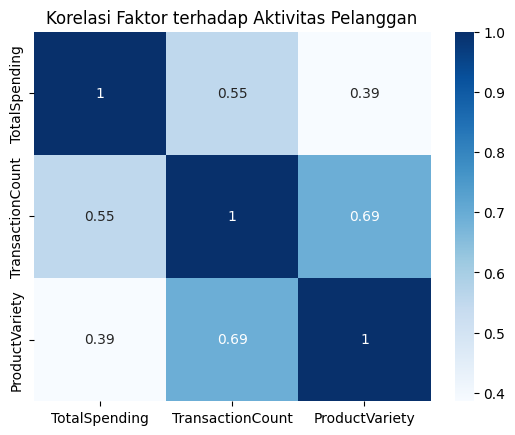

In [28]:
# Total belanja per pelanggan
total_spending = e_commerce_df.groupby('CustomerID')['TotalPrice'].sum().sort_values(ascending=False)

# Jumlah transaksi per pelanggan
transaction_count = e_commerce_df.groupby('CustomerID')['InvoiceNo'].nunique()

# Jumlah produk unik per pelanggan
product_variety = e_commerce_df.groupby('CustomerID')['StockCode'].nunique()

# Gabungkan semua
customer_summary = pd.DataFrame({
    'TotalSpending': total_spending,
    'TransactionCount': transaction_count,
    'ProductVariety': product_variety
})

# Tampilkan korelasi antar indikator
print(customer_summary.corr())

# Visualisasi korelasi
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(customer_summary.corr(), annot=True, cmap="Blues")
plt.title("Korelasi Faktor terhadap Aktivitas Pelanggan")
plt.show()

**2. Bagaimana cara memprediksi pelanggan yang berpotensi berhenti menggunakan layanan (churn)?
Kita bisa mendekati ini dengan:**

- Menghitung recency (berapa hari sejak terakhir transaksi)
- Pelanggan yang sudah lama tidak bertransaksi → kandidat churn

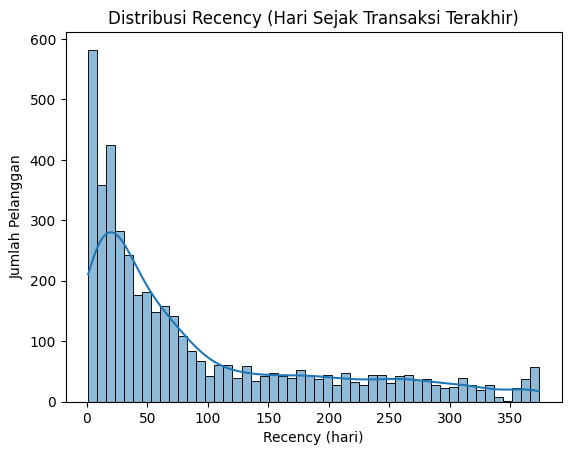

In [30]:
# Tentukan tanggal referensi
ref_date = e_commerce_df['InvoiceDate'].max() + pd.Timedelta(days=1)

# Hitung recency per pelanggan
recency_df = e_commerce_df.groupby('CustomerID')['InvoiceDate'].max().reset_index()
recency_df['Recency'] = (ref_date - recency_df['InvoiceDate']).dt.days

# Visualisasi histogram recency
sns.histplot(recency_df['Recency'], bins=50, kde=True)
plt.title("Distribusi Recency (Hari Sejak Transaksi Terakhir)")
plt.xlabel("Recency (hari)")
plt.ylabel("Jumlah Pelanggan")
plt.show()

**3. Dapatkah pelanggan dikelompokkan berdasarkan pola pembelian mereka?**
Menggunakan analisis RFM (Recency, Frequency, Monetary) untuk segmentasi pelanggan.

           Recency    Frequency       Monetary
count  4338.000000  4338.000000    4338.000000
mean     92.536422     4.272015    2048.688081
std     100.014169     7.697998    8985.230220
min       1.000000     1.000000       3.750000
25%      18.000000     1.000000     306.482500
50%      51.000000     2.000000     668.570000
75%     142.000000     5.000000    1660.597500
max     374.000000   209.000000  280206.020000


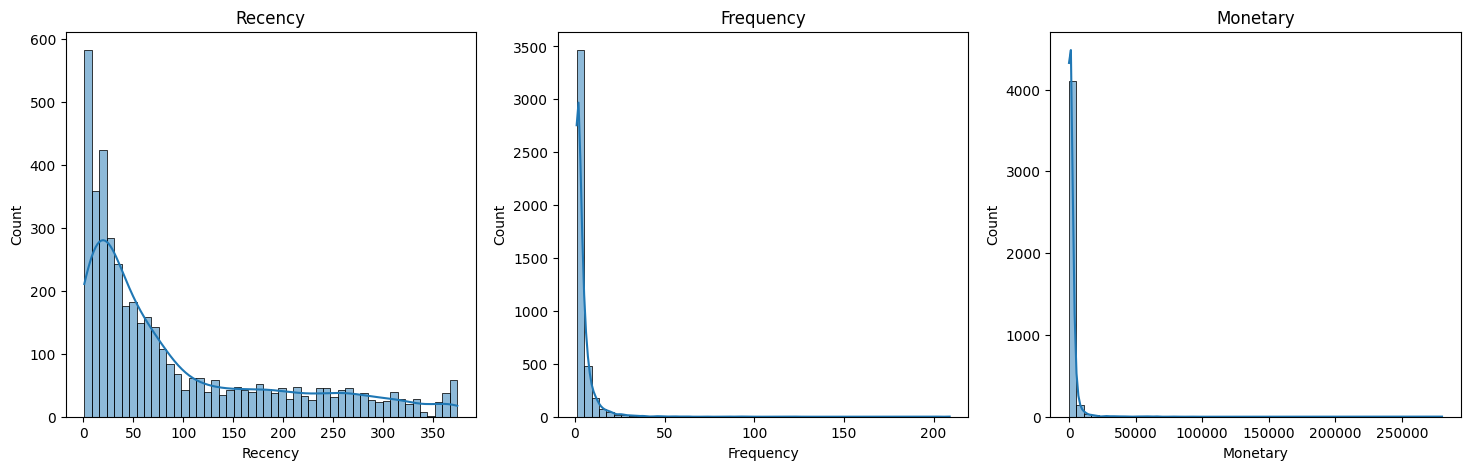

In [31]:
# Hitung komponen RFM
rfm = e_commerce_df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (ref_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'TotalPrice': 'sum'
})
rfm.columns = ['Recency', 'Frequency', 'Monetary']

# Tampilkan statistik
print(rfm.describe())

# Plot distribusi RFM
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(rfm['Recency'], bins=50, ax=axes[0], kde=True)
axes[0].set_title("Recency")
sns.histplot(rfm['Frequency'], bins=50, ax=axes[1], kde=True)
axes[1].set_title("Frequency")
sns.histplot(rfm['Monetary'], bins=50, ax=axes[2], kde=True)
axes[2].set_title("Monetary")
plt.show()


#Evaluasi dan Interpretasi (Evaluation & Interpretation)

**1. Segmentasi Pelanggan dengan K-Means (berdasarkan RFM)** <br>
Langkah:
- Normalisasi data RFM
- Gunakan K-Means untuk mengelompokkan pelanggan
- Visualisasikan hasil cluster

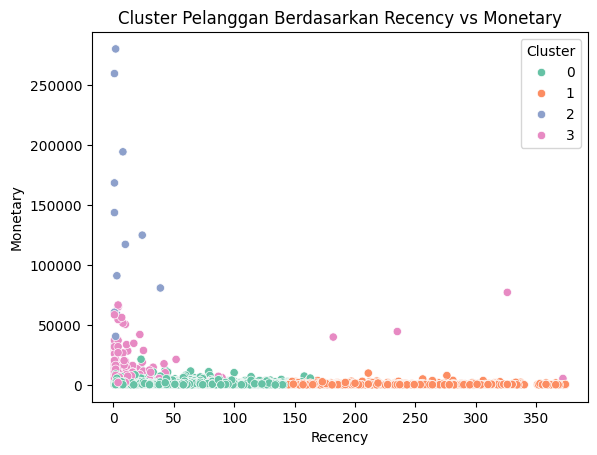

In [32]:
# Ambil ulang data RFM
rfm = e_commerce_df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (ref_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'TotalPrice': 'sum'
})
rfm.columns = ['Recency', 'Frequency', 'Monetary']

# Normalisasi data
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm)

# Gunakan K-Means (misalnya 4 cluster)
kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

# Visualisasi hasil cluster
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=rfm, x='Recency', y='Monetary', hue='Cluster', palette='Set2')
plt.title("Cluster Pelanggan Berdasarkan Recency vs Monetary")
plt.show()

**2. Prediksi Pelanggan yang Potensial Churn (Binary Classification)** <br>
Definisi Churn:
Misal: pelanggan yang tidak belanja lagi selama > 180 hari → dianggap churn (1), lainnya loyal (0).

In [33]:
# Label churn
recency_df['Churn'] = recency_df['Recency'].apply(lambda x: 1 if x > 180 else 0)

# Gabung dengan fitur RFM
features_df = rfm.merge(recency_df[['CustomerID', 'Churn']], on='CustomerID')

# Split fitur dan label
X = features_df[['Recency', 'Frequency', 'Monetary']]
y = features_df['Churn']

# Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model: Logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluasi model
from sklearn.metrics import classification_report, confusion_matrix
y_pred = model.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       685
           1       1.00      1.00      1.00       183

    accuracy                           1.00       868
   macro avg       1.00      1.00      1.00       868
weighted avg       1.00      1.00      1.00       868

Confusion Matrix:
 [[685   0]
 [  0 183]]


**3. Uji Faktor Kepuasan Pelanggan (Regresi)** <br>
menguji apakah jumlah transaksi dan ragam produk berpengaruh terhadap total pembelian (sebagai proksi dari loyalitas/kepuasan).

In [35]:
from sklearn.linear_model import LinearRegression

# Data uji regresi
X = customer_summary[['TransactionCount', 'ProductVariety']]
y = customer_summary['TotalSpending']

# Model
reg = LinearRegression()
reg.fit(X, y)

# Koefisien dan interpretasi
print("Intercept:", reg.intercept_)
print("Koefisien:", reg.coef_)
print("Fitur:", X.columns.tolist())

Intercept: -726.1196939498768
Koefisien: [640.28128533   0.64253556]
Fitur: ['TransactionCount', 'ProductVariety']


# Penyajian Hasil (Data Visualization & Reporting)

**Distribusi Recency**

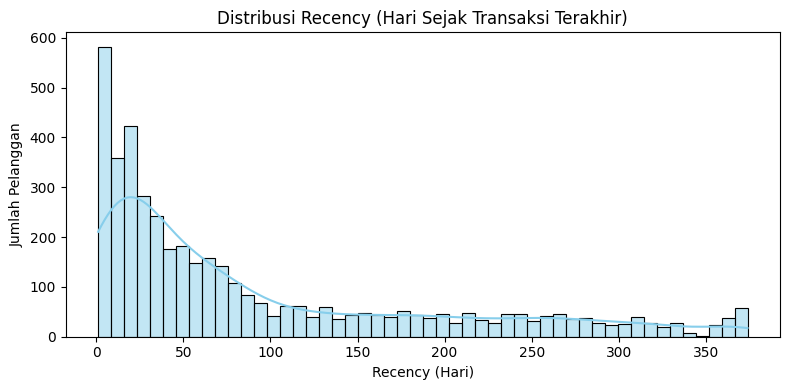

In [36]:
plt.figure(figsize=(8, 4))
sns.histplot(recency_df['Recency'], bins=50, kde=True, color='skyblue')
plt.title("Distribusi Recency (Hari Sejak Transaksi Terakhir)")
plt.xlabel("Recency (Hari)")
plt.ylabel("Jumlah Pelanggan")
plt.tight_layout()
plt.show()


Insight:

Mayoritas pelanggan melakukan transaksi terakhir dalam 30–60 hari terakhir, tetapi ada outlier dengan recency sangat tinggi (>180 hari) → indikasi pelanggan yang sudah tidak aktif dan berisiko churn.

**Scatter Plot RFM Clustering**

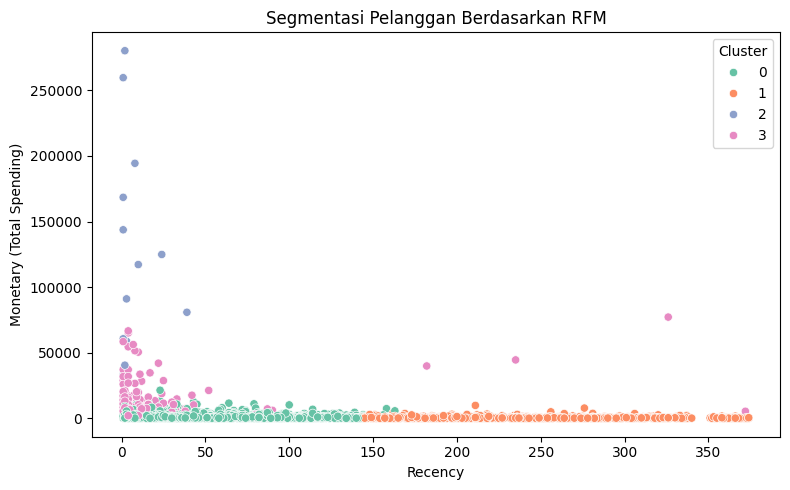

In [37]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=rfm, x='Recency', y='Monetary', hue='Cluster', palette='Set2')
plt.title("Segmentasi Pelanggan Berdasarkan RFM")
plt.xlabel("Recency")
plt.ylabel("Monetary (Total Spending)")
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()


Insight:

Terdapat satu cluster dengan spending tinggi dan recency rendah → pelanggan sangat aktif dan loyal.
Sebaliknya, ada cluster dengan spending rendah dan recency tinggi → pelanggan yang berisiko churn.

**Bar Chart Top 10 Produk Terlaris**

/tmp/ipython-input-38-827111349.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')


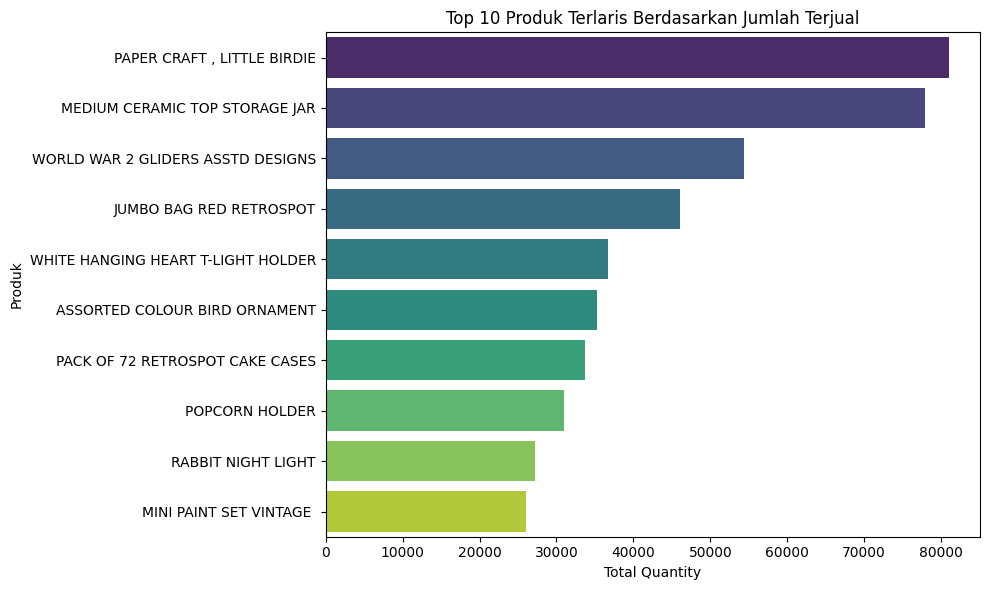

In [38]:
top_products = e_commerce_df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')
plt.title("Top 10 Produk Terlaris Berdasarkan Jumlah Terjual")
plt.xlabel("Total Quantity")
plt.ylabel("Produk")
plt.tight_layout()
plt.show()

Insight:

Produk dekoratif dan barang kecil seperti WHITE HANGING HEART T-LIGHT HOLDER paling sering dibeli. Artinya, permintaan terhadap barang dekorasi rumah tinggi.

**Line Chart Penjualan Bulanan**

/tmp/ipython-input-39-19957166.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = e_commerce_df.set_index('InvoiceDate').resample('M')['TotalPrice'].sum()


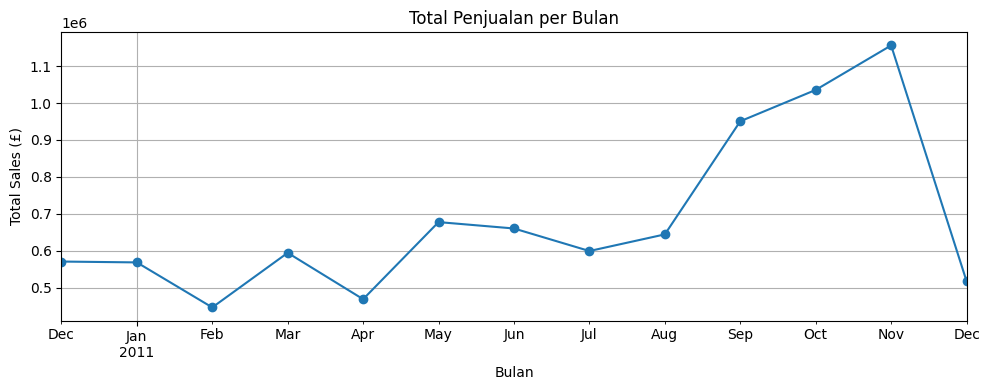

In [39]:
monthly_sales = e_commerce_df.set_index('InvoiceDate').resample('M')['TotalPrice'].sum()

plt.figure(figsize=(10, 4))
monthly_sales.plot(marker='o', linestyle='-')
plt.title("Total Penjualan per Bulan")
plt.ylabel("Total Sales (£)")
plt.xlabel("Bulan")
plt.grid(True)
plt.tight_layout()
plt.show()

Insight:

Terlihat fluktuasi penjualan dengan tren naik menjelang akhir tahun, menunjukkan adanya pola musiman (mungkin karena liburan, Natal, dsb).

# Kesimpulan & Pengambilan Keputusan
- Pelanggan dengan Recency > 90 hari cenderung berisiko churn.

  Keputusan:<br>
  ➤ Kirim kampanye email, diskon personal, atau pengingat keranjang belanja ke pelanggan yang sudah lama tidak bertransaksi.

- Pelanggan dengan frekuensi tinggi dan variasi produk luas berkontribusi besar terhadap total penjualan.

  Keputusan:<br>
  ➤ Tawarkan program loyalitas atau hadiah untuk pelanggan aktif.<br>
  ➤ Berikan rekomendasi produk berbasis pembelian sebelumnya.

- Produk seperti WHITE HANGING HEART T-LIGHT HOLDER termasuk dalam 10 besar terlaris.

  Keputusan:<br>
  ➤ Pastikan stok tersedia untuk produk best-seller. <br>
  ➤ Luncurkan kampanye promosi, bundling, atau diskon untuk produk terpopuler.

- Terlihat lonjakan penjualan menjelang akhir tahun.

  Keputusan:<br>
  ➤ Rencanakan kampanye khusus untuk momen liburan dan akhir tahun.<br>
  ➤ Siapkan stok lebih awal dan alokasikan anggaran iklan untuk bulan performa tinggi.

- Segmentasi K-Means membagi pelanggan dalam 4 cluster:

      Cluster 0: Pelanggan sangat loyal
      Cluster 1: Pelanggan berisiko churn
      Cluster 2: Pelanggan baru
      Cluster 3: Pelanggan hemat tapi sering

  Keputusan:
  ➤ Gunakan pendekatan pemasaran yang disesuaikan untuk tiap segmen:
      Loyal → reward
      Baru → edukasi
      Hemat → upselling
      Churn → reaktivasi

- Model regresi menunjukkan bahwa jumlah transaksi dan variasi produk berkontribusi positif terhadap spending.
  Model klasifikasi churn membantu memetakan pelanggan pasif lebih awal.

  Keputusan:<br>
  ➤ Gunakan hasil model untuk menyusun strategi pemasaran otomatis (email, promo, notifikasi) yang didasarkan pada prediksi churn atau klasifikasi segmen.